In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from PIL import Image
import random
import math
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
training_data = np.load('./output/training_data.npy')
training_labels = np.load('./output/training_dists.npy')

#pad the training data matrix so it is 100x1024

#(500, 100, 1000, 1)

# zero_padding_array = np.zeros((500,100,600,1))

In [3]:
training_data.shape

(500, 100, 1000, 1)

In [4]:
training_labels.shape

(500, 10000)

In [5]:
# zero_padding_array.shape

In [6]:
# print(training_data.shape)
# training_data = np.concatenate([training_data, zero_padding_array], axis=2)
print(training_data.shape)

print(training_labels.shape)

samples_count = training_data.shape[0]

train_size = math.floor(0.85*training_data.shape[0])

shuffle_indices = random.sample(range(0, samples_count), samples_count)

indices_train = shuffle_indices[0:train_size]
indices_test = shuffle_indices[train_size:samples_count]

X_train = training_data[indices_train,:]
Y_train = training_labels[indices_train]

X_test = training_data[indices_test,:]
Y_test = training_labels[indices_test]

print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)

print('Y_train.shape : ', Y_train.shape)
print('Y_test.shape : ', Y_test.shape)

np.save('./output/X_test.npy', X_test)
np.save('./output/Y_test.npy', Y_test)

(500, 100, 1000, 1)
(500, 10000)
X_train.shape :  (425, 100, 1000, 1)
X_test.shape :  (75, 100, 1000, 1)
Y_train.shape :  (425, 10000)
Y_test.shape :  (75, 10000)


In [7]:
model = Sequential()

# Layer 1
model.add(Conv2D(10, input_shape=X_train.shape[1:], kernel_size=(3,3), strides=(1,1)))
#model.add(Conv2D(48, input_shape=(400,11,1), kernel_size=(2,2), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
model.add(Conv2D(5, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3
model.add(Conv2D(5, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4
model.add(Conv2D(1, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 5
model.add(Flatten())
model.add(Dense(Y_train.shape[1], activation='relu'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 998, 10)       100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 98, 998, 10)       40        
_________________________________________________________________
activation_1 (Activation)    (None, 98, 998, 10)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 499, 10)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 497, 5)        455       
_________________________________________________________________
batch_normalization_2 (Batch (None, 47, 497, 5)        20        
_________________________________________________________________
activation_2 (Activation)    (None, 47, 497, 5)       

In [9]:
opt = keras.optimizers.Adam(lr=0.01, decay=1e-5)

In [10]:
# (4) Compile 
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

In [11]:
# (5) Train
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=16, epochs=30, verbose=1)

model.save('./output/CNN_model_03.h5')

Train on 425 samples, validate on 75 samples
Epoch 1/30
425/425 [==============================] - 12s 29ms/step - loss: 0.3272 - accuracy: 0.0000e+00 - val_loss: 0.2984 - val_accuracy: 0.0000e+00
Epoch 2/30
425/425 [==============================] - 12s 27ms/step - loss: 0.3081 - accuracy: 0.0000e+00 - val_loss: 0.3023 - val_accuracy: 0.0000e+00
Epoch 3/30
425/425 [==============================] - 12s 27ms/step - loss: 0.3044 - accuracy: 0.0024 - val_loss: 0.3081 - val_accuracy: 0.0000e+00
Epoch 4/30
425/425 [==============================] - 12s 28ms/step - loss: 0.3006 - accuracy: 0.0000e+00 - val_loss: 0.3076 - val_accuracy: 0.0000e+00
Epoch 5/30
425/425 [==============================] - 12s 27ms/step - loss: 0.2983 - accuracy: 0.0000e+00 - val_loss: 0.3076 - val_accuracy: 0.0000e+00
Epoch 6/30
425/425 [==============================] - 12s 28ms/step - loss: 0.2950 - accuracy: 0.0000e+00 - val_loss: 0.3076 - val_accuracy: 0.0000e+00
Epoch 7/30
425/425 [===========================

In [12]:
training_result = model.evaluate(X_train, Y_train)
testing_result = model.evaluate(X_test, Y_test)

75/75 [==============================] - 1s 8ms/step


In [13]:
print('Training Acc: ', training_result)
print('Testing Acc: ', testing_result)

Training Acc:  [0.2828469340941485, 0.004705882165580988]
Testing Acc:  [0.26730059464772543, 0.0]


## Load Model

In [14]:
model = keras.models.load_model('./output/CNN_model_03.h5')

## X_train plot

In [15]:
X_train_results = model.predict(X_train)

In [16]:
train_show_index = 0

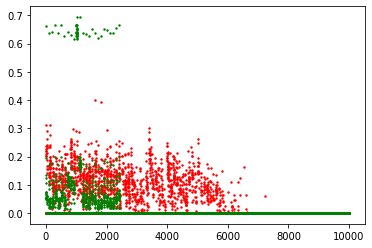

In [17]:
plt.scatter(range(X_train_results[train_show_index].shape[0]), X_train_results[train_show_index], c='r', s = 2)
plt.scatter(range(Y_train[train_show_index].shape[0]), Y_train[train_show_index], c='g', s = 2)

## X_test plot


In [18]:
X_test_results = model.predict(X_test)

In [19]:
test_show_index = 0

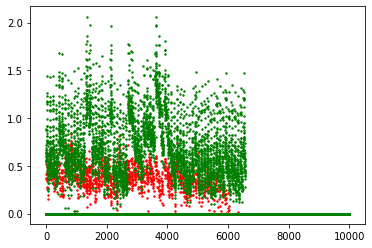

In [20]:
plt.scatter(range(X_test_results[test_show_index].shape[0]), X_test_results[test_show_index], c='r', s = 2)
plt.scatter(range(Y_test[test_show_index].shape[0]), Y_test[test_show_index], c='g', s = 2)

## Loss Decrease Plot

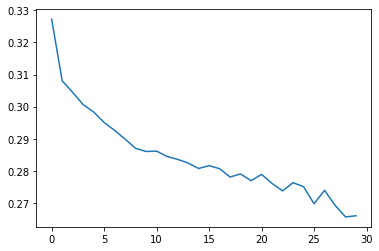

In [21]:
plt.plot(history.history['loss'])
plt.show()